## viscosity _ 2bins 72/28 _ lr = 3e-4 _ 30 epochs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Any, Collection, Dict, List, Optional, Tuple, Union
from numpy.typing import ArrayLike
from fastcore.all import L
import pycm

In [3]:
def evaluate_classification(
    y_true: ArrayLike,
    y_pred: ArrayLike,
) -> Dict[str, Any]:
    """Evaluate a classification task.

    Args:
        y_true (ArrayLike): The true labels.
        y_pred (ArrayLike): The predicted labels.

    Returns:
        Dict[str, Any]: A dictionary of metrics.
    """
    might_have_rounded_floats = False
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length."
    y_true = L([int(x) for x in y_true])

    y_pred_new = []
    int_indices = []
    for i, x in enumerate(y_pred):
        try:
            x_int = int(x)
            if x_int != x:
                might_have_rounded_floats = True
                logger.warning("y_pred contains rounded floats.")
            y_pred_new.append(x_int)
            int_indices.append(i)
        except Exception as e:
            y_pred_new.append(None)
    y_pred_new = L(y_pred_new)

    frac_valid = len(int_indices) / len(y_true)
    if len(int_indices) == 0:
        logger.warning("No valid predictions found.")
        y_pred_valid = L([None] * len(y_true))
        y_true_valid = y_true

    else:
        y_true_valid = y_true[int_indices]
        y_pred_valid = y_pred_new[int_indices]

    cm = pycm.ConfusionMatrix(list(y_true_valid), list(y_pred_valid))
    return {
        "accuracy": cm.Overall_ACC,
        "acc_macro": cm.ACC_Macro,
        "racc": cm.Overall_RACC,
        "kappa": cm.Kappa,
        "confusion_matrix": cm,
        "f1_macro": cm.F1_Macro,
        "f1_micro": cm.F1_Micro,
        "frac_valid": frac_valid,
        "all_y_true": y_true,
        "all_y_pred": y_pred,
        "valid_indices": int_indices,
        "might_have_rounded_floats": might_have_rounded_floats,
    }

In [4]:
from glob import glob
from fastcore.xtras import load_pickle
import os 
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt 
import matplotlib as mpl
#import seaborn as sns
import numpy as np 

from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 3.25
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

import sys

sys.path.append("../plotutils/")
from plotutils import *

plt.style.use("../plotutils/your.mplstyle")

import matplotx

In [5]:
all_res = glob(f"./*.pkl")
print(f"Pickles found: {len(all_res)}")

Pickles found: 30


### ADJUST dictionary according to experiment

In [6]:
all_res

['./20240427-192739_80_43_predictions.pkl',
 './20240427-192743_40_43_predictions.pkl',
 './20240427-192743_70_43_predictions.pkl',
 './20240427-192746_40_44_predictions.pkl',
 './20240427-192749_60_43_predictions.pkl',
 './20240427-192751_70_42_predictions.pkl',
 './20240427-192756_50_42_predictions.pkl',
 './20240427-192759_40_42_predictions.pkl',
 './20240427-192802_60_42_predictions.pkl',
 './20240427-192806_50_43_predictions.pkl',
 './20240427-192833_80_42_predictions.pkl',
 './20240427-193031_50_45_predictions.pkl',
 './20240427-193037_40_45_predictions.pkl',
 './20240427-193057_50_44_predictions.pkl',
 './20240427-193057_70_44_predictions.pkl',
 './20240427-193057_80_44_predictions.pkl',
 './20240427-193100_60_44_predictions.pkl',
 './20240427-193105_80_45_predictions.pkl',
 './20240427-193129_70_45_predictions.pkl',
 './20240427-193220_60_45_predictions.pkl',
 './20240427-193225_60_46_predictions.pkl',
 './20240427-193239_40_46_predictions.pkl',
 './20240427-193301_50_46_predic

In [7]:
compiled_res_list = []
conf_mats = []

for res in all_res:
    res = load_pickle(res)
    nan_prediction_mask = np.isnan(res["predictions"])
    try:
        results = evaluate_classification(res["targets"], res["predictions"][~nan_prediction_mask])
    except:
        results = evaluate_classification(res["true"], res["predictions"][~nan_prediction_mask])
    summary = {
        'train_size': res['train_size'],
        'accuracy': results['accuracy'],
        'acc_macro': results['acc_macro'],
        'racc': results['racc'],
        'kappa': results['kappa'],
        'f1_macro': results['f1_macro'],
        'f1_micro': results['f1_micro'],
        'frac_valid': results['frac_valid'],
        'valid_indices': results['valid_indices'],
        'might_have_rounded_floats': results['might_have_rounded_floats'],
    }
    
    confusion_matrix = {
        'all_y_true': results['all_y_true'],
        'all_y_pred': results['all_y_pred']
    }
    
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [8]:
compiled_res = pd.DataFrame(compiled_res_list)

In [9]:
compiled_res = compiled_res.sort_values(['train_size']).iloc[:, 0:8]
compiled_res

,train_size,accuracy,acc_macro,racc,kappa,f1_macro,f1_micro,frac_valid
12,40,0.750000,0.750000,0.673333,0.234694,0.596593,0.750000,1.0
1,40,0.650000,0.650000,0.514444,0.279176,0.626667,0.650000,1.0
3,40,0.733333,0.733333,0.680556,0.165217,0.554731,0.733333,1.0
21,40,0.750000,0.750000,0.673333,0.234694,0.596593,0.750000,1.0
25,40,0.383333,0.383333,0.326667,0.084158,0.361886,0.383333,1.0
7,40,0.650000,0.650000,0.543333,0.233577,0.610991,0.650000,1.0
22,50,0.740000,0.740000,0.605600,0.340771,0.670218,0.740000,1.0
13,50,0.600000,0.600000,0.508800,0.185668,0.575552,0.600000,1.0
11,50,0.740000,0.740000,0.676000,0.197531,0.577648,0.740000,1.0
24,50,0.740000,0.740000,0.676000,0.197531,0.577648,0.740000,1.0


### ADJUST columns according to grouping

In [10]:
grouped_res = compiled_res.groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy           acc_macro                racc            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
40          0.652778  0.057157  0.652778  0.057157  0.568611  0.056738   
50          0.713333  0.022901  0.713333  0.022901  0.634933  0.030286   
60          0.779167  0.011932  0.779167  0.011932  0.633125  0.012800   
70          0.766667  0.035486  0.766667  0.035486  0.655556  0.028683   
80          0.719298  0.024287  0.719298  0.024287  0.605854  0.031882   

               kappa            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
40          0.205253  0.028441  0.557910  0.040404  0.652778  0.057157   
50          0.205247  0.048978  0.578834  0.036326  0.713333  0.022901   
60          0.393848  0.039666  0.692726  0.020447  0.779167  0.011932   
70          0.319041  0.078339  0.639829  0.044727  0.766667  0.035486   
80          0.274771  0.063405  0.618954  0.032789  0.719298  0.024287   

           frac_valid       
                 mean  sem  
train_size                  
40                1.0  0.0  
50                1.0  0.0  
60                1.0  0.0  
70                1.0  0.0  
80                1.0  0.0

[[0.85365854 0.14634146]
 [0.58333333 0.41666667]]
accuracy: 0.6351626016260162


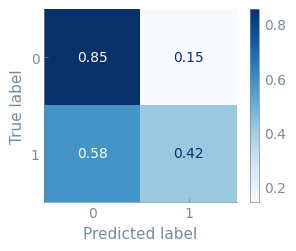

In [11]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]
confusion_matrix_max = []
for index, _ in enumerate(conf_mats_max):
    try:
        preds = conf_mats_max[index]
        actual = preds["all_y_true"]
        predicted = preds["all_y_pred"]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_max.append(confusion_matrix)
    except Exception as e:
        print(e)
norm_confusion_matrix = sum(confusion_matrix_max)/[[sum(sum(confusion_matrix_max)[0])], [sum(sum(confusion_matrix_max)[1])]]
print(norm_confusion_matrix)

acc1=0
for i in range(len(norm_confusion_matrix)):
    acc=norm_confusion_matrix[i][i]
    acc1=acc1+acc
acc=acc1/sum(sum(norm_confusion_matrix))

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = norm_confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig('classif_viscosity_confusionMatrix_72_28_30ep_size80.pdf', bbox_inches='tight')

In [12]:
sizes = np.sort(compiled_res["train_size"].unique())
print(sizes)

[40 50 60 70 80]


In [13]:
print(grouped_res.loc[np.sort(sizes), :]['accuracy'])

                mean       sem
train_size                    
40          0.652778  0.057157
50          0.713333  0.022901
60          0.779167  0.011932
70          0.766667  0.035486
80          0.719298  0.024287


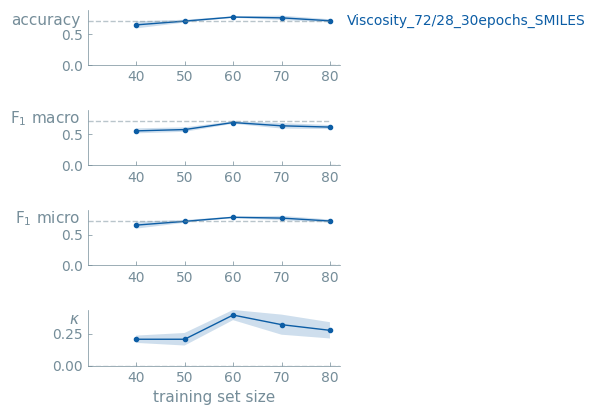

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

n_bins = 2
representations = ['72/28_30epochs_SMILES']

for representation in representations:
    ax[0].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean'],
        marker='o',
        label=f'Viscosity_{representation}'
    )
    ax[0].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean']
        -grouped_res.loc[sizes, :]['accuracy']['sem'],
        grouped_res.loc[sizes, :]['accuracy']['mean']
        +grouped_res.loc[sizes, :]['accuracy']['sem'],
        alpha = 0.2
    )
    
    ax[0].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0.72, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top('accuracy', ax=ax[0])
    ax[0].set_xticks(sizes)

    ax[1].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[1].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        -grouped_res.loc[sizes, :]['f1_macro']['sem'],
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        +grouped_res.loc[sizes, :]['f1_macro']['sem'],
        alpha=0.2
    )

    ax[1].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0.72, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ax[1].set_xticks(sizes)

    ax[2].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean'],
        marker='o',
        label=f'{representation}'
    )

    ax[2].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        -grouped_res.loc[sizes, :]['f1_micro']['sem'],
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        +grouped_res.loc[sizes, :]['f1_micro']['sem'],
        alpha=0.2
    )

    ax[2].hlines(0.9, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0.72, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ax[2].set_xticks(sizes)

    ax[3].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[3].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean']
        -grouped_res.loc[sizes, :]['kappa']['sem'],
        grouped_res.loc[sizes, :]['kappa']['mean']
        +grouped_res.loc[sizes, :]['kappa']['sem'],
        alpha=0.2
    )
    
    #ax[3].hlines(0.8, 30, 30, linestyle='--', color='#758D99', alpha=0.5)
    ax[3].hlines(0, 30, 80, linestyle='--', color='#758D99', alpha=0.5)
    ax[3].hlines(0, 80, 82, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'$\kappa$', ax=ax[3])
    ax[3].set_xticks(sizes)

ax[-1].set_xlabel('training set size')

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig('classif_viscosity_72_28_30ep.pdf', bbox_inches='tight')